# GEODATAFRAME

In [ ]:
from geodataframe.GeodataframeCreator import create_geodataframe

create_geodataframe()

# CROPPING

geodataframe/results/azno1/Enhanced_facades_for_extraction_1473_facades.geojson
azno1

Processing building 1/1473
Heading building:  1.2407795592444286
i:  0
j:  0
    heading  i  j
0  1.539378  0  0
1 -0.056821  1  0
Max heading: 2.5553099427311547
Building edges: -0.12478042845186672, 2.5954064379518713
Midpoint column index: 1733
Proportions: first=-0.510, second=0.505
Building column indices: 320 to 3134
Saved cropped building to: cropping/azno1\cropped_buildings/pano_000005_000005_building_cropped.jpg
Cropped image size: 2814x3646 pixels


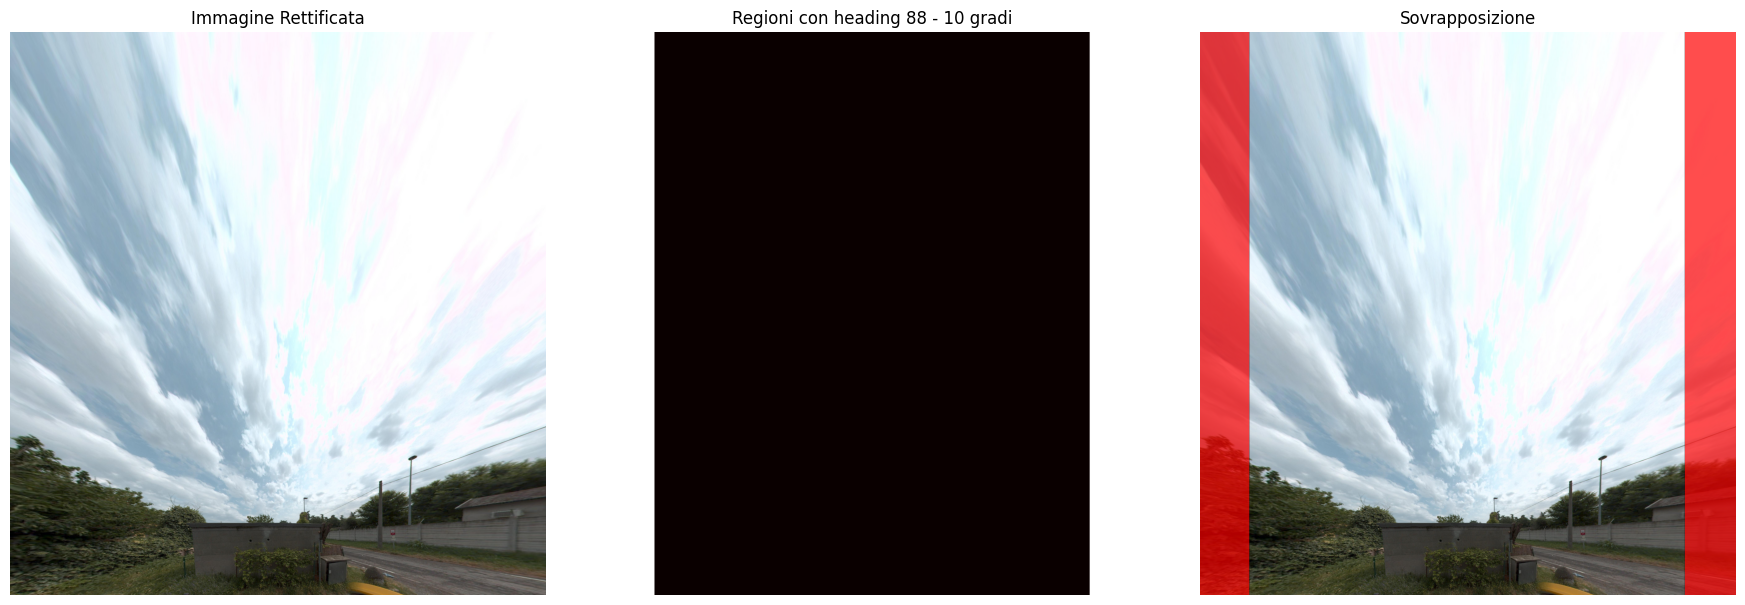


Processing building 2/1473
Heading building:  0.9988307589896488
i:  0
j:  1
    heading  i  j
0 -1.522986  0  0
1  1.602119  0  1
2  0.028614  1  0
3  3.169517  1  1
Max heading: 2.33938009486504
Building edges: -0.16569367758861536, 2.4372565225986627
Midpoint column index: 1733
Proportions: first=-0.435, second=0.537
Building column indices: 528 to 3221
Saved cropped building to: cropping/azno1\cropped_buildings/pano_000157_000007_building_cropped.jpg
Cropped image size: 2693x3646 pixels


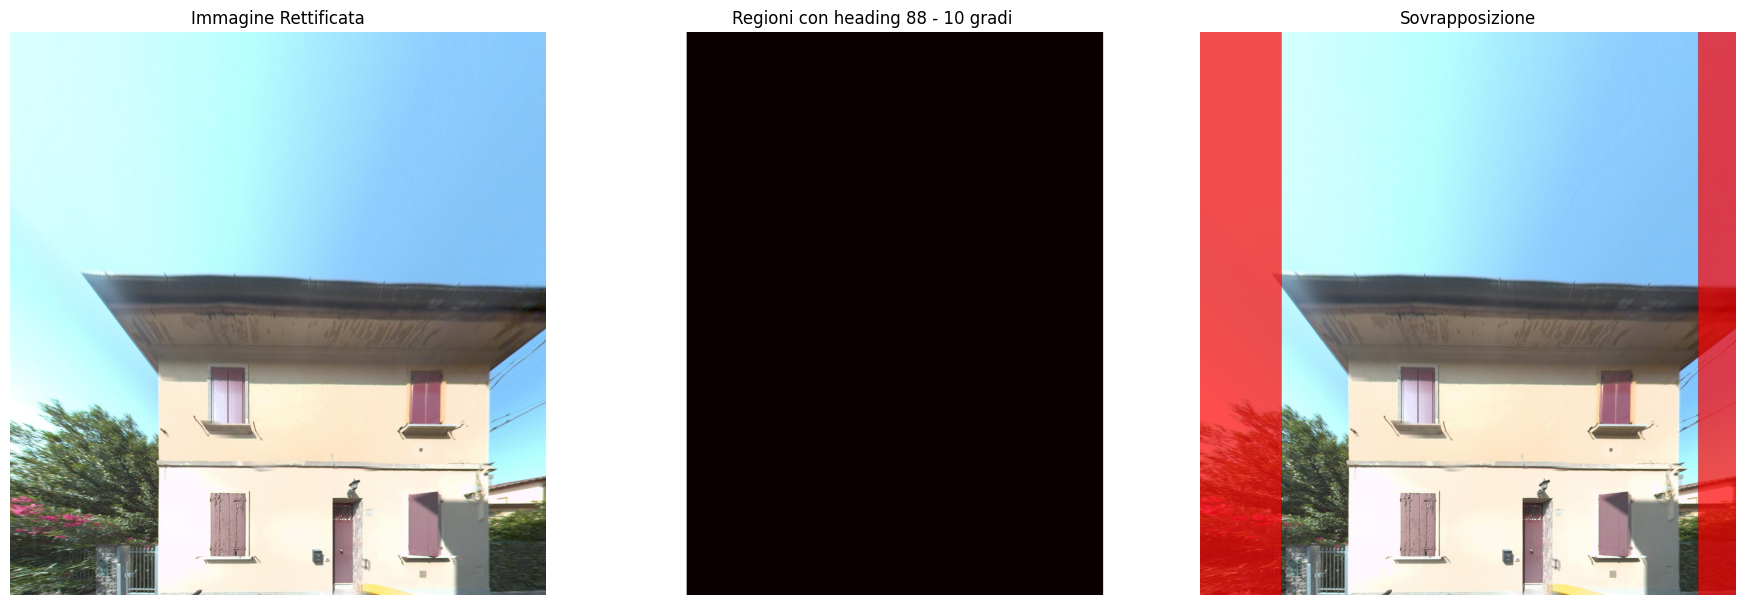


Processing building 3/1473
Heading building:  -1.685079482525053
i:  0
j:  1
    heading  i  j
0 -1.523513  0  0
1  1.593892  0  1
2  0.055556  1  0


KeyboardInterrupt: 

In [1]:
from cropping.BuildingExtractor import BuildingFacadeExtractor
from s3_library.S3Client import S3Client

s3_client = S3Client()

for zone in s3_client.list_all_sub_folders('data', 'geodataframe/results'):
    file_names = s3_client.list_files('data', 'geodataframe/results/' + zone)
    geodataframe_path = [name for name in file_names if name.endswith('.geojson')][0]

    print(geodataframe_path)
    print(zone)

    # Create extractor with custom configuration (esempio di utilizzo diretto)
    extractor = BuildingFacadeExtractor(
        geojson_path=geodataframe_path,
        root_dir='rectification/',
        country_city='results/',
        save_cropped_buildings=True,
        output_dir='cropping/',
        s3_client=s3_client,
        zone_name=zone
    )

    # Extract all buildings
    extractor.extract_all_buildings()